# nmi | spring 2024
## lecture 16 : variable step-size


### 6.5 variable step-size


for variable step-size method, first consider the error of the local step. ie, given a tolerance, if a step is rejected, its step-size is reduced for rerun; if it is accepted, the next step-size is decided. that process needs methods to 1) approximate error and 2) determine step-size. for the latter, the most obvious method is to halve and double.
</br></br>

ie, (2) at step $i$ compare error $e_i$ (or relative error, $\frac{e_i}{|w_i|}$) with tolerance $T$. if tolerance is not met, repeat step $i$ with $h_i = \frac{h_i}{2}$; if tolerance is met too well, the next step-size $h_{i+1} = 2\times h_i$.
</br>


note: wrt absolute or relative error, a general purpose comparison is with $\frac{e_i}{max(|w_i|,\theta)}$ where $\theta > 0$ compensates for very small $w_i$.
</br>

also, with ODE-solver experience, take order into account. ie, assume solver of order $p$ that has error $e_i = \mathcal{O}(h^{p+1})$. ie, given (relative) tolerance $T$ then $\frac{e_i}{|w_i|} < T$.
</br></br>

consider $e_i \approx ch_i^{p+1}$ with some constant $c$, then the best step size for the next step $h_{i+1}$ satisfies
</br></br>

$$T|w_i| = ch^{p+1}$$
</br>
$$\quad\Downarrow\quad\text{and}$$
</br>
$$\boxed{\quad h_* = 0.8 \left( \frac{T|w_i|}{e_i} \right)^{\frac{1}{p+1}h_i}\quad}$$
</br>

where $0.8$ is cautionary. if tolerance is met, $h_* \Rightarrow h_{i+1}$ and if not, $h_* \Rightarrow h_i$ for rerun.
</br></br>

both these methods rely heavily on error estimates of the local step $e_i = |z_{i+1}-w_{i-1}|$ and on how much that error costs to calculate computationally. a common strategy to control step size in ODE solvers is to use two solvers of different orders called embedded pairs. queue RK.
</br>


#### 6.5.1 embedded runge-kutta pairs


##### example 19: RK23


ie, explicit trapezoid method of order two paired with an RK3 (here, simpsons) to approximate error.
</br></br>

\begin{align}
  w_{i+1} &= w_i + h\frac{s_1 + s_2}{2} \\
  z_{i+1} &= w_i + h\frac{s_1 + 4s_3 + s_2}{6} \\
  \\
  &\quad\Downarrow\quad\text{where} \\
  \\
  s_1 &= f(t_i,w_i) \\
  s_2 &= f(t_i+h,w_i+hs_1) \\
  s_3 &= f\left( t_i+\frac{1}{2}h,w_i+\frac{1}{2}h\frac{s_1+s_2}{2} \right) \\
  \\
  &\quad\Downarrow\quad\text{and} \\
  \\
  e_{i+1} &\approx |w_{i+1} - z_{i+1}| = \left| h\frac{s_1 - 2s_3 + s_2}{3} \right|.
\end{align}
</br>

and with error estimated, step-size $h_*$ is also estimated.
</br></br>

also, using a higher order error approximation is called <b>local extrapolation</b> - specifically using $z_{i+1}$ instead of $w_{i+1}$ to calculate step-size and to advance the approximation.
</br>


##### example 20: bogacki-shampine 2/3


[@wiki](https://en.wikipedia.org/wiki/Bogacki%E2%80%93Shampine_method) paper [@sciencedirect](https://www.sciencedirect.com/science/article/pii/0893965989900797)
</br></br>

\begin{align}
  s_1 &= f(t_i,w_i) \\
  s_2 &= f(t_i+\frac{1}{2}h,w_i+\frac{1}{2}hs_1) \\
  s_3 &= f\left( t_i+\frac{3}{4}h,w_i+\frac{3}{4}hs_2 \right) \\
  \\
  &\quad\Downarrow \\
  \\
  z_{i+1} &= w_i + \frac{h}{9}(2s_1 + 3s_2 + 4s_3) \\
  s_4 &= f(t_i+h,z_{i+1}) \\
  w_{i+1} &= w_i + \frac{h}{24}(7s_1 + 6s_2 + 8s_3 + 3s_4) \\
  \\
  &\quad\Downarrow \\
  \\
  e_{i+1} &= |z_{i+1} - w_{i+1}| = \frac{h}{72}|-5s_1 + 6s_2 + 8s_3 - 9s_4|.
\end{align}
</br>

note $s_4$ becomes $s_1$ on next step if it is accepted. ie, no wasted stages. and so this RK2 is also called FSAL ~ First Same As Last.
</br>


##### example 21: runge-kutta-fehlberg 4/5 (RKF45)


[@wiki](https://en.wikipedia.org/wiki/Bogacki%E2%80%93Shampine_method) fehlberg [@nasa](https://ntrs.nasa.gov/api/citations/19680027281/downloads/19680027281.pdf)
</br></br>

\begin{align}
  s_1 &= f(t_i,w_i) \\
  s_2 &= f(t_i+\frac{1}{4}h,w_i+\frac{1}{4}hs_1) \\
  s_3 &= f\left( t_i+\frac{3}{8}h,w_i+\frac{3}{32}hs_1+\frac{9}{32}hs_2 \right) \\
  s_4 &= f\left( t_i+\frac{12}{13}h,w_i+\frac{1932}{2197}hs_1-\frac{7200}{2197}hs_2+\frac{7296}{2197}hs_3 \right) \\
  s_5 &= f\left( t_i+h,w_i+\frac{439}{216}hs_1-8hs_2+\frac{3680}{513}hs_3-\frac{845}{4104}hs_4 \right) \\
  s_6 &= f\left( t_i+\frac{1}{2}h,w_i-\frac{8}{27}hs_1+2hs_2-\frac{3544}{2565}hs_3+\frac{1859}{4104}hs_4-\frac{11}{40}hs_5 \right) \\
  \\
  &\quad\Downarrow \\
  \\
  w_{i+1} &= w_i + h\left( \frac{25}{216}s_1 + \frac{1408}{2565}s_3 + \frac{2197}{4104}s_4 - \frac{1}{5}s_5 \right) \\
  z_{i+1} &= w_i + h\left( \frac{16}{135}s_1 + \frac{6656}{12825}s_3 + \frac{28561}{56430}s_4 - \frac{9}{50}s_5 + \frac{2}{55}s_6 \right) \\
  \\
  &\quad\Downarrow \\
  \\
  e_{i+1} &= |z_{i+1} - w_{i+1}| = h\left| \frac{1}{360}s_1 - \frac{128}{4275}s_3 - \frac{2197}{75240}s_4 + \frac{1}{50}s_5 + \frac{2}{55}s_6 \right|.
\end{align}
</br>

apparently RKF45 is the best-known variable step-size one-step method.
</br></br>

if successful, the new $w_1$ is replaced with the locally extrapolated version $z_1$ <i>to determine step-size</i> $h_*$; else the step is rerun with a step-size $h$ calculated with $p = 4$. (further failures halve the step-size.)
</br>


##### example 22: dormand-prince 4/5

[@scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.RK45.html) [@wiki](https://en.wikipedia.org/wiki/Dormand%E2%80%93Prince_method) paper [@sciencedirect](https://www.sciencedirect.com/science/article/pii/0771050X80900133?via%3Dihub)
</br></br>

\begin{align}
  s_1 &= f(t_i,w_i) \\
  s_2 &= f(t_i+\frac{1}{5}h,w_i+\frac{1}{5}hs_1) \\
  s_3 &= f\left( t_i+\frac{3}{10}h,w_i+\frac{3}{40}hs_1+\frac{9}{40}hs_2 \right) \\
  s_4 &= f\left( t_i+\frac{4}{5}h,w_i+\frac{44}{45}hs_1-\frac{56}{15}hs_2+\frac{32}{9}hs_3 \right) \\
  s_5 &= f\left( t_i+h\frac{8}{9},w_i+h\left( \frac{19372}{6561}hs_1-\frac{25360}{2187}hs_2 + \frac{64448}{6561}hs_3 - \frac{212}{729}hs_4 \right)\right) \\
  s_6 &= f\left( t_i+h,w_i+h\left( \frac{9017}{3168}hs_1-\frac{355}{33}hs_2+\frac{46732}{5247}hs_3+\frac{49}{176}hs_4-\frac{5103}{18656}hs_5 \right)\right) \\
  \\
  &\quad\Downarrow \\
  \\
  z_{i+1} &= w_i + h\left( \frac{35}{384}s_1 + \frac{500}{1113}s_3 + \frac{125}{192}s_4 - \frac{2187}{6784}s_5 + \frac{11}{84}s_6\right) \\
  s_7 &= f(t_i,z_i) \\
  w_{i+1} &= w_i + h\left( \frac{5179}{57600}s_1 + \frac{7571}{16695}s_3 + \frac{393}{640}s_4 + \frac{92097}{339200}s_5 + \frac{187}{2100}s_6 + \frac{1}{40}s_7 \right) \\
  \\
  &\quad\Downarrow \\
  \\
  e_{i+1} &= |z_{i+1} - w_{i+1}| = h\left| \frac{71}{57600}s_1 - \frac{71}{16695}s_3 + \frac{71}{1920}s_4 - \frac{17253}{339200}s_5 + \frac{22}{525}s_6 - \frac{1}{40}s_7 \right|.
\end{align}
</br>

note the placement of $s_7$ in the order of things. this is also an FSAL method in that $s_7$ becomes $s_1$ if the step is accepted.
</br>


example 22 revisits example 01.
</br></br>

\begin{align}
  \textrm{example 23} \quad
  \left\{ \quad
    \begin{array}{l}
      y' = ty + t^3 \\
      y(0) = y_0 \\
      t \in [0,1]
    \end{array}
  \right.
\end{align}
</br>

exact solution: $y(t) = 3e^{\frac{t^2}{2}} - t^2 -2$.
</br>


###### code


,t,y,w1,e1
0,0.000000,1.000000,1.000000,5.000000e-09
1,0.000100,1.000000,1.000000,0.000000e+00
2,0.001100,1.000001,1.000001,6.000002e-07
3,0.011100,1.000062,1.000062,6.160190e-05
4,0.111100,1.006229,1.006229,6.190292e-03
5,0.405159,1.092464,1.092464,8.463809e-02
6,0.699218,1.341862,1.341862,2.547668e-01
7,0.931195,1.761106,1.761106,4.321749e-01
8,1.000000,1.946164,1.946164,4.861686e-01


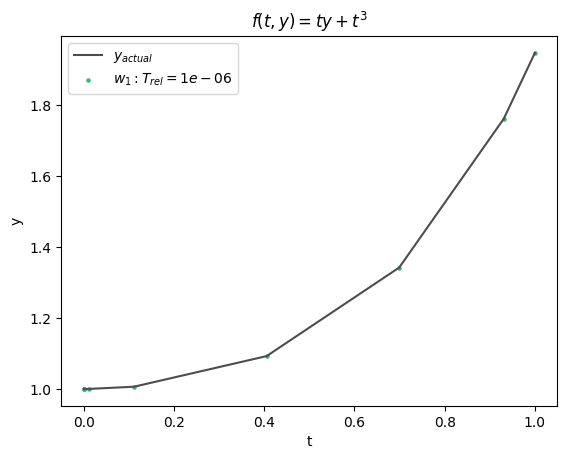

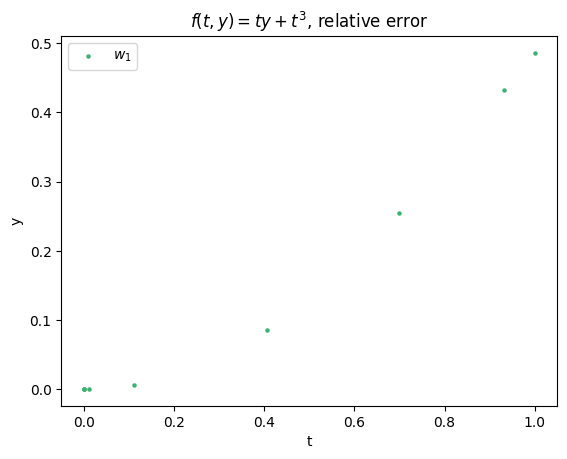

In [ ]:
#import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import integrate

yact = lambda t: 3*np.exp(t*t/2) - t*t -2
ydot = lambda t,y: t*y + pow(t,3)
y0 = [1]
ts = [0,1]
tol = 1e-6

sol = integrate.solve_ivp(fun=ydot,t_span=ts,y0=y0,rtol=tol) # default RK45

ds = np.zeros((sol.y.size,4)) # t,y,[w,e]x3 # not soup yet
ds[:,0] = sol.t
ds[:,1] = yact(sol.t)
ds[:,2] = sol.y # w1 @ t_rel = 1e-4
#ds[:,3] = abs(ds[:,1] - ds[:,2])/ds[:,1] # gotta fix "/", forgot
for i in range(ds[:,3].size):
  ds[i,3] = abs(ds[i,1]-ds[1,2])/ds[i,1] # relative error

df = pd.DataFrame(data=ds,columns=["t","y","w1","e1"])
df["e1"].map("{:,.2%}".format) # sigh
if True: # spreadsheet
  display(df)
if True: # plot
  ax1 = df.plot(x = "t",y="y",label="$y_{actual}$",color=".3")
  ax11  = df.plot(x = "t",y="w1",label="$w_1: T_{rel}="+str(tol)+"$",ax=ax1,color="mediumseagreen",marker=".",kind="scatter")
  ax1.set_title("$f(t,y) = ty + t^3$")
  ax1.set_xlabel("t")
  ax1.set_ylabel("y")

  ax2 = df.plot(x = "t",y="e1",label="$w_1$",color="mediumseagreen",marker=".",kind="scatter")
  ax2.set_title("$f(t,y) = ty + t^3$, relative error")
  ax2.set_xlabel("t")
  ax2.set_ylabel("y")


results for $T_{rel} = 0.0001$.
</br>


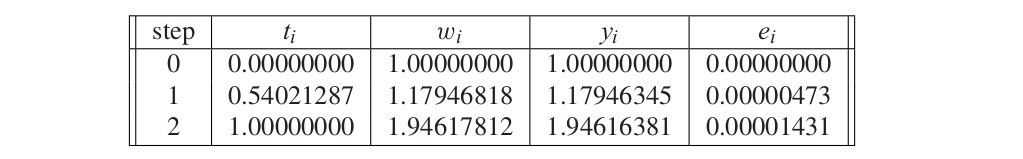

results for $T_{rel} = 0.00001$.
</br>


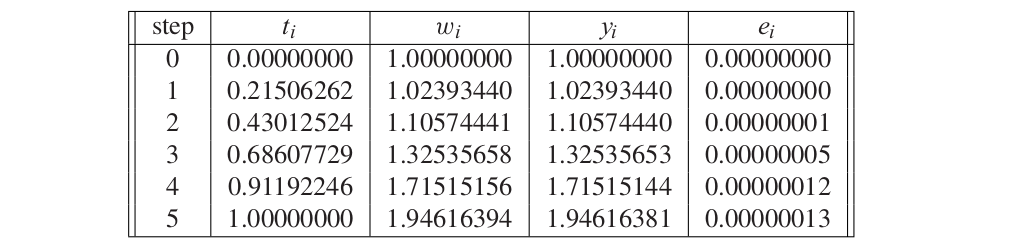

##### example 23


compare RKF45 (dormund-prince) with RK23 at $T=1e-04$ for IVP

\begin{align}
  \textrm{example 23} \quad
  \left\{ \quad
    \begin{array}{l}
      y' = 10(1-y) \\
      y(0) = \frac{1}{2} \\
      t \in [0,100]
    \end{array}
  \right.
\end{align}
</br>

exact solution: $y(t) = 1-\frac{e^{-10t}}{2}$.
</br>


###### code


In [ ]:
# not soup yet

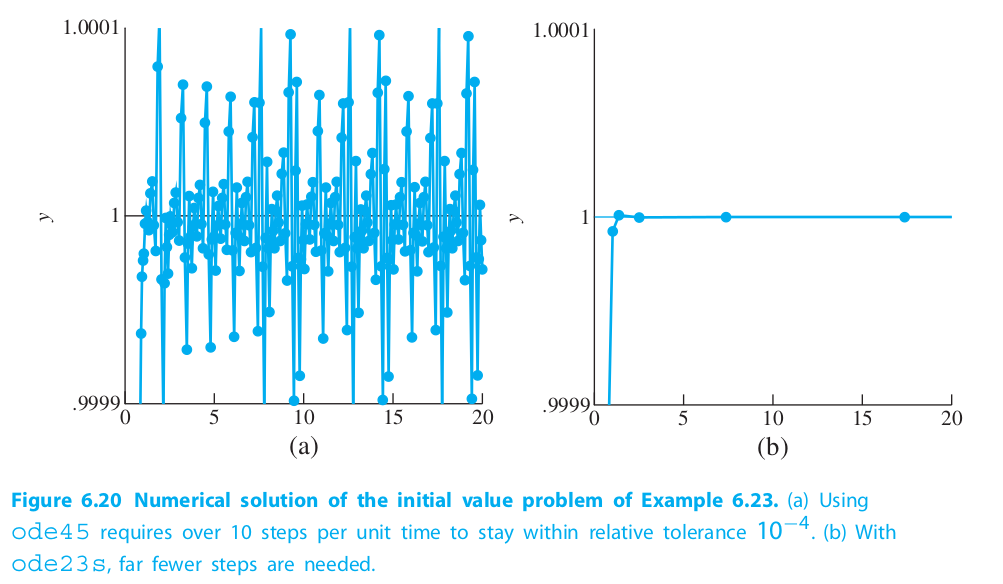